# Redukcija dimenzija
Andrea Hrelja, Mario Sliško

#### Redukcija Dimenzije

Seminar u sklopu kolegija Otkrivanje znanja u podacima na Odjelu za informatiku, Sveučilište u
Rijeci ak. god. 2021/2022.

U sklopu ovog seminara, Metoda glavnih komponenata primijenjena je na skup podataka dostupan
u sklopu kolegija Otkrivanje znanja u podacima s nazivom „Political Persuasion“. Za primjenu ove
metode bi razumijevanja dostupnih podataka od strane analitičara poboljšalo kvalitetu rezultata,
ali sama metoda ne podrazumijeva razumijevanje podataka da bi dostavila kvalitetan rezultat.
Skup se sastoji od 79 varijabli (78 neovisnih i 1 ovisna).

Metoda je primijenjena koristeći Python programski jezik i biblioteka numpy, matplotlib, pandas,
sklearn i ostalih

In [1]:
import pandas as pd
import numpy as np
DATA_PATH = './data/Voter-Persuasion.csv'
df = pd.read_csv(DATA_PATH)
df

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,...,S,1,0,N,N,N,N,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,...,S,1,0,N,N,N,N,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,...,L,1,0,N,N,N,Y,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,...,S,1,0,N,N,N,N,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,...,S,1,0,N,N,N,N,0,1,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,359896,2,0,46,1,0,1,34,63,29,...,L,0,1,N,N,N,N,0,1,V
9996,456503,3,0,87,0,0,1,45,87,9,...,U,0,1,Y,N,Y,Y,1,0,T
9997,610953,1,0,18,3,0,0,38,76,17,...,S,0,1,N,N,N,N,0,1,T
9998,367417,1,0,50,1,2,0,38,85,4,...,S,0,1,N,N,N,N,0,1,V


#### Enkodiranje kategoričkih vrijednosti
Enkodiranje kategoričkih vrijednosti koristeći Label Encoding pristup.

In [4]:
category_df = df.select_dtypes(include=['object'])
category_df = category_df.drop('Partition', axis=1)
category_df = category_df.astype('category')

for col in category_df.columns:
    df[col] = category_df[col].cat.codes
df.head()

,VOTER_ID,SET_NO,OPP_SEX,AGE,HH_ND,HH_NR,HH_NI,MED_AGE,NH_WHITE,NH_AA,...,CAND2S,MESSAGE_A,MESSAGE_A_REV,I3,CAND1_UND,CAND2_UND,MOVED_AD,MOVED_A,opposite,Partition
0,193801,2,0,28,1,1,1,37,61,34,...,1,1,0,0,0,0,0,0,1,V
1,627701,1,0,53,2,0,0,46,87,8,...,1,1,0,0,0,0,0,0,1,T
2,306924,2,0,68,2,1,0,41,23,64,...,0,1,0,0,0,0,1,1,0,T
3,547609,1,0,66,0,2,0,35,53,29,...,1,1,0,0,0,0,0,0,1,T
4,141105,3,0,23,0,3,1,42,74,18,...,1,1,0,0,0,0,0,0,1,T


#### Odvajanje train i test podataka
Koristimo train_test_split funkciju iz sklearn paketa da bi podijelili podatke u train (67%) i
test (33%) podatke.

In [5]:
from sklearn.model_selection import train_test_split
all_columns = df.columns.tolist()
all_columns.remove('Partition')
X = df[all_columns]
y = df['Partition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Identificiranje Multikolinearnosti koristeći Faktor inflacije varijacije
Faktor inflacije varijacije (engl. Variance Inflation Factors, VIF) pokazuje kolika je stopa kolin-
earnosti između nezavisnih varijabli. “Pravilo palca” glasi da bi svaki VIF > 5 trebali tretirati kao
umjerenu stopu kolinearnosti, a svaki VIF > 10 kao jaku stopu kolinearnosti.

In [6]:
import statsmodels.stats.outliers_influence as inf
moderate_vif = 0
severe_vif = 0
drop_columns = []
vif_factors = [inf.variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
for i, vif in enumerate(vif_factors):
    if vif > 5 and vif < 10:
        moderate_vif += 1
        #print("`{}` - umjerena stopa kolinearnosti".format(X_train.columns[i]))
    
    if vif > 10:
        severe_vif += 1
        drop_columns.append(X_train.columns[i])
        #print("`{}` - jaka stopa kolinearnosti".format(X_train.columns[i]))
print("Od {} nezavisnih varijabli, njih {} ima umjerenu stopu kolinearnosti".format(len(X_train.columns), moderate_vif))
print("Od {} nezavisnih varijabli, njih {} ima jaku stopu kolinearnosti".format(len(X_train.columns), severe_vif))

c:\Users\mario\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Od 78 nezavisnih varijabli, njih 7 ima umjerenu stopu kolinearnosti
Od 78 nezavisnih varijabli, njih 36 ima jaku stopu kolinearnosti


#### Skaliranje podataka
Podaci su skalirani koristeći metode standardizacije (StandardScaler) i normalizacije (MinMaxS-
caler). Metoda normalizacije se kasnije pokazala kao bolji izbor.

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
normal = MinMaxScaler()
normal.fit(X_train)
X_train_normal = normal.transform(X_train)
X_test_normal = normal.transform(X_test)

#### Provedba PCA metode nad skaliranim podacima
PCA (Principal Component Analysis) metoda je nad skaliranim podacima primijenjena koristeći
više brojeva primarnih komponenti (n_components). Kao završni rezultat, odabrane su 2 primarne
komponente zbog jednostavnijeg prikaza na PCA grafu.

Da bi odlučili koliko primarnih komponenti želimo iskoristiti, ispisujemo omjere varijanci PCA
metode (pca.explained_variance_ratio_). Omjeri varijance PCA metode govore nam koliki je
postotak varijance sadržan za određenu komponentu.

Kada su podaci skalirani metodom standardizacije, omjeri varijanci iznose 14% za prvu komponentu
te 23% za drugu komponentu. Kada su podaci skalirani metodom normalizacije, omjeri varijanci
iznose 20% za prvu komponentu te 33% za drugu komponentu.

Stoga su u daljnjoj analizi korišteni podaci skalirani metodom normalizacije.

##### Kriteriji za odabir broja primarnih komponenti
Postoji nekoliko kriterija za odabir broja primarnih komponenti, a u sklopu ovog seminara proma-
trana su dva kriterija: - Kaiserovo pravilo (Kriterij Eigenvrijednosti) - odabir primarnih komponenti
s eigenvrijednosti većom od 1 - Omjer varijance - odabir primarnih komponenti koje zajednički čine
više od 80% ili 90% omjera varijance

In [8]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components)
principal_components = pca.fit_transform(X_train_normal)
principal_components_test = pca.fit_transform(X_test_normal)
np.cumsum(pca.explained_variance_ratio_)

array([0.20376043, 0.33496994])

#### Kriterij Eigenvrijednosti
Sljedeći graf prikazuje eigenvrijednosti odabranih dvaju primarnih komponenti. Zbog naglog pada
eigenvrijednosti nakon prve primarne komponente, odabrane su dvije primarne komponente.

Omjer varijanci odabranih komponenti iznosi 33%, što opisuje tek trećinu promatranog skupa
podataka, ali broj primarnih komponenti nije povećan zbog lakšeg prikaza odnosa ovih dvaju
komponenti u kasnijoj fazi analize.

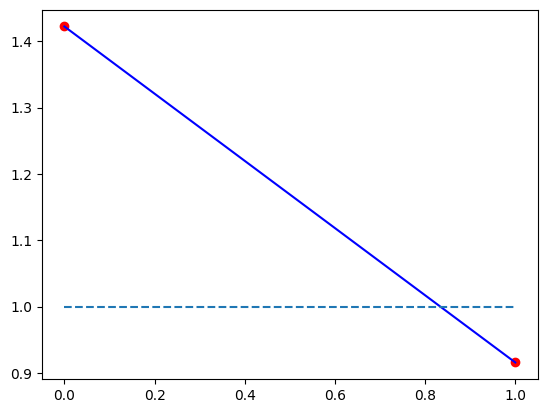

In [9]:
from matplotlib import pyplot as plt
eigenvalues = pca.explained_variance_
plt.plot(range(n_components), eigenvalues, 'ro')
plt.plot(range(n_components), eigenvalues, 'b-')
plt.plot(range(n_components), [1]*n_components, '--')
plt.show()

#### Prikaz primarnih komponenti
Da bi prikazali odnos između odabranih primarnih komponenti, stvaramo pandas okvir podataka
čije su kolumne primarne komponente, a dodatno sadrži i varijablu target koju nastojimo pred-
vidjeti koristeći odabrane primarne komponente.

Stvaramo dva okvira podataka - jedan za primarne komponente train skupa podataka, i jedan za
primarne komponente testnog skupa podataka.

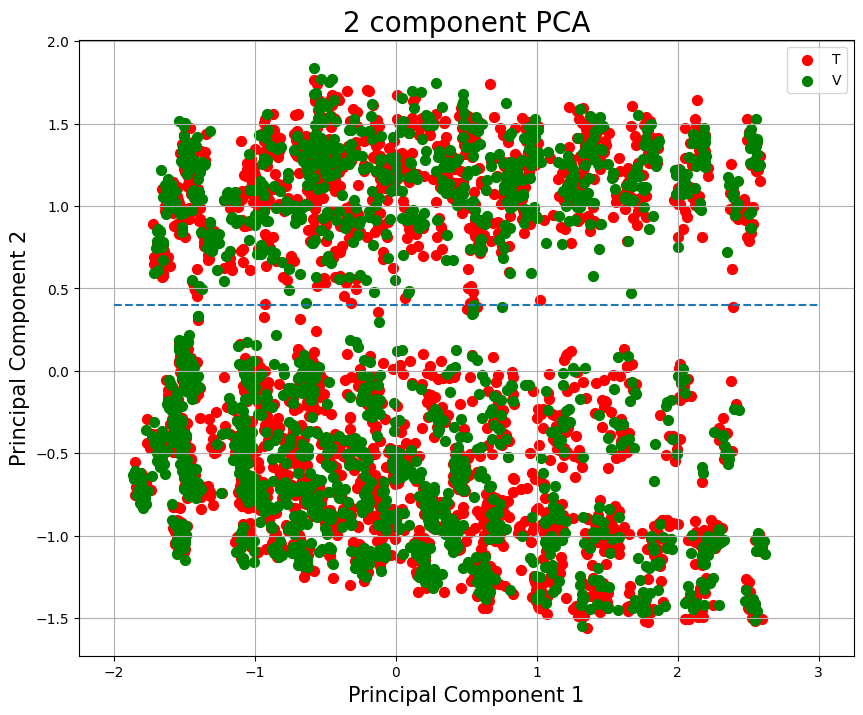

In [11]:
principal_df = pd.DataFrame(
data=principal_components,
columns=['Principal component 1', 'Principal component 2'])

principal_df['target'] = y_train
principal_df_test = pd.DataFrame(
data=principal_components_test,
columns=['Principal component 1', 'Principal component 2'])
principal_df_test['target'] = y_test

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['T', 'V']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    filtered = principal_df['target'] == target
    ax.scatter(
        principal_df.loc[filtered, 'Principal component 1'],
        principal_df.loc[filtered, 'Principal component 2'],
        c=color,
        s=50
)
ax.legend(targets)
pc1_range = range(-2, 4)
ax.plot(pc1_range, [0.4]*len(pc1_range), '--')
ax.grid()

Gornji graf prikazuje odnos primarnih komponenti. Stvoreni klasteri (grupe) obojani su zelenom
i crvenom bojom gdje svaka boja denotira vrijednost varijable koju nastojimo predvidjeti. Zbog velike varijacije ovih dvaju primarnih komponenti, možemo zaključiti da će modeli strojnog učenja imati niske performanse. Isto tako možemo ponuditi opcije za nastavak analize: - povećanje broja primarnih komponenti - korištenje druge metode za redukciju dimenzije

#### Implementacija modela strojnog učenja
Za predviđanje target varijable, koristimo modele stabla odlučivanja i nasumičnih šuma. Modeli
daju slične rezultate, a njihovi rezultati nisu zadovoljavajući.

In [12]:
X_train = principal_df.drop('target', axis=1)
X_test = principal_df_test.drop('target', axis=1)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=3)
dtc.fit(X_train, y_train)
training_score = dtc.score(X_train, y_train)
testing_score = dtc.score(X_test, y_test)
print("Train score: {:.2f}".format(training_score))
print("Test score: {:.2f}".format(testing_score))

Train score: 0.60
Test score: 0.59


In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth=3)
rfc.fit(X_train, y_train)
training_score = rfc.score(X_train, y_train)
testing_score = rfc.score(X_test, y_test)
print("Train score: {:.2f}".format(training_score))
print("Test score: {:.2f}".format(testing_score))

Train score: 0.60
Test score: 0.59
